In [1]:
import numpy as np
import sep

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [3]:
# read image into standard 2-d numpy array
data = fits.getdata("image.fits")

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
[W 2024-12-06 18:00:29,093.093 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
[W 2024-12-06 18:00:29,140.140 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
[W 2024-12-06 18:00:29,144.144 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:09> EXPO EMM

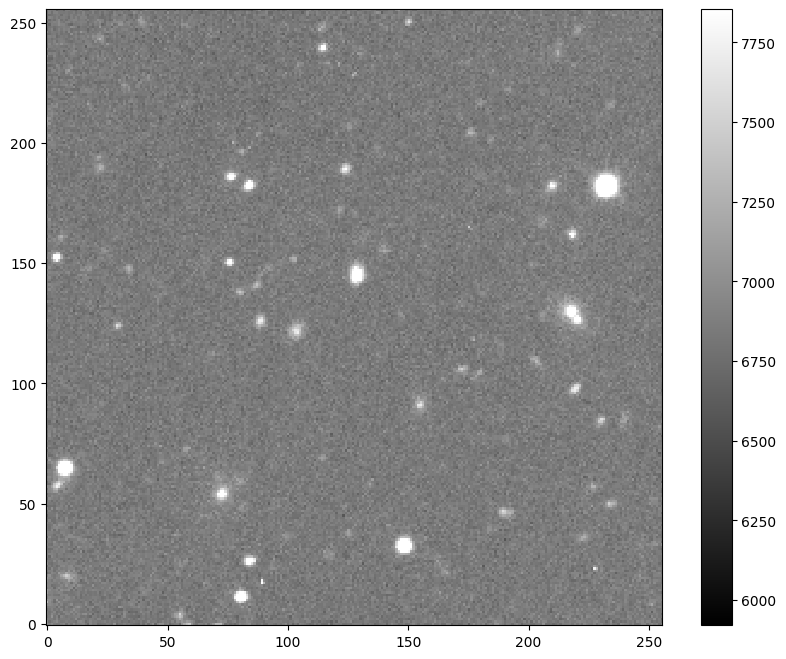

In [4]:
# show the image
m, s = np.mean(data.data), np.std(data.data)
plt.imshow(data.data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('tutorial_image.png')

In [5]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [6]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [7]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

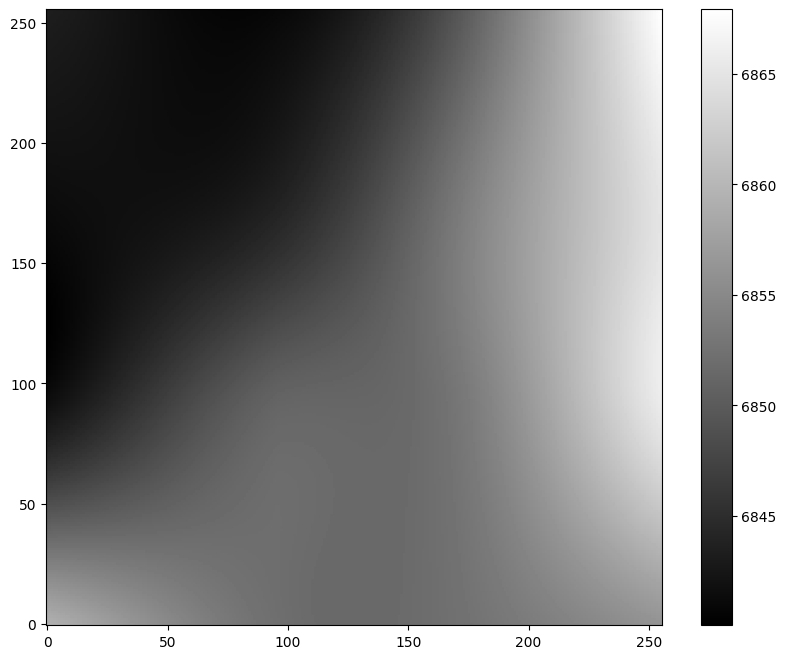

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('tutorial_background.png')

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

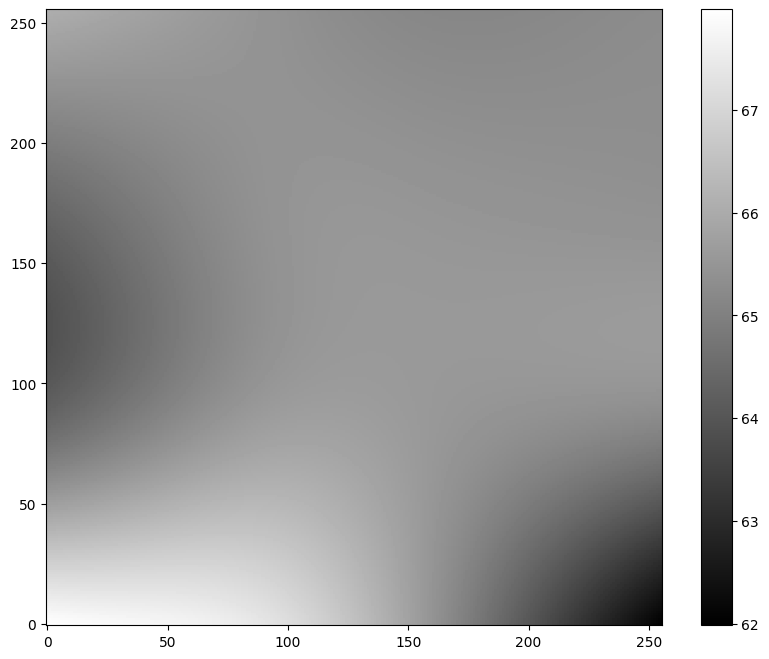

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('tutorial_background_noise.png')

In [11]:
# subtract the background
data_sub = data - bkg


In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [13]:
# how many objects were detected
len(objects)

69

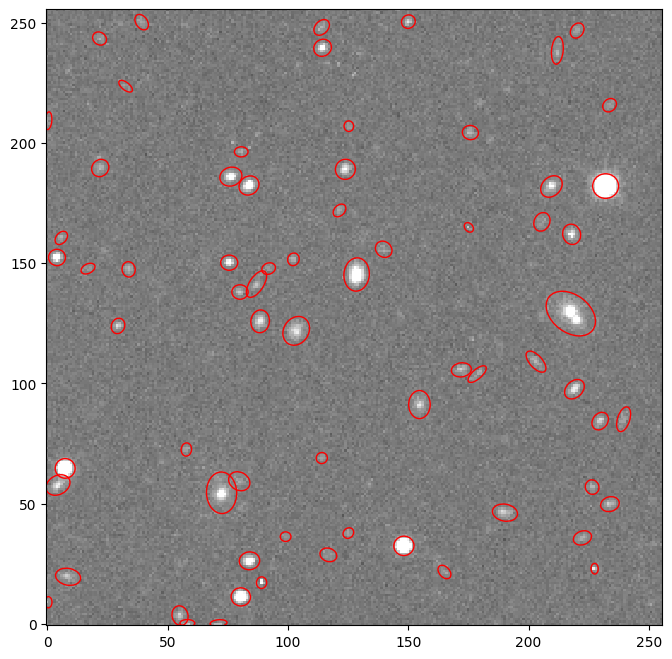

In [14]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('Tutorial_Circled_Objects.png')

In [15]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [17]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


(array([66.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1429.52681641,  90887.68029687, 180345.83377734, 269803.98725781,
        359262.14073828, 448720.29421875, 538178.44769922, 627636.60117969,
        717094.75466016, 806552.90814063, 896011.06162109]),
 <BarContainer object of 10 artists>)

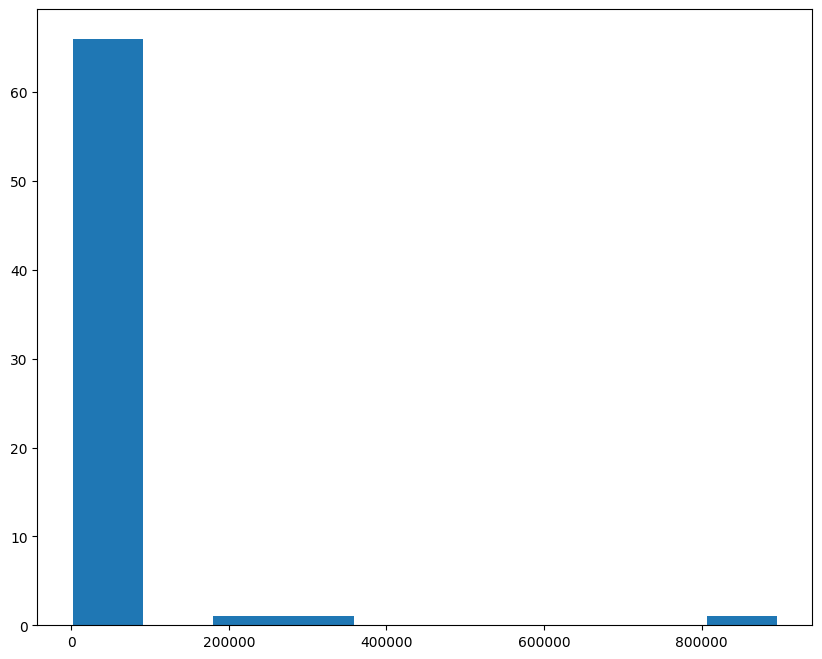

In [20]:
plt.hist(flux)

In [3]:
# read image into standard 2-d numpy array
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

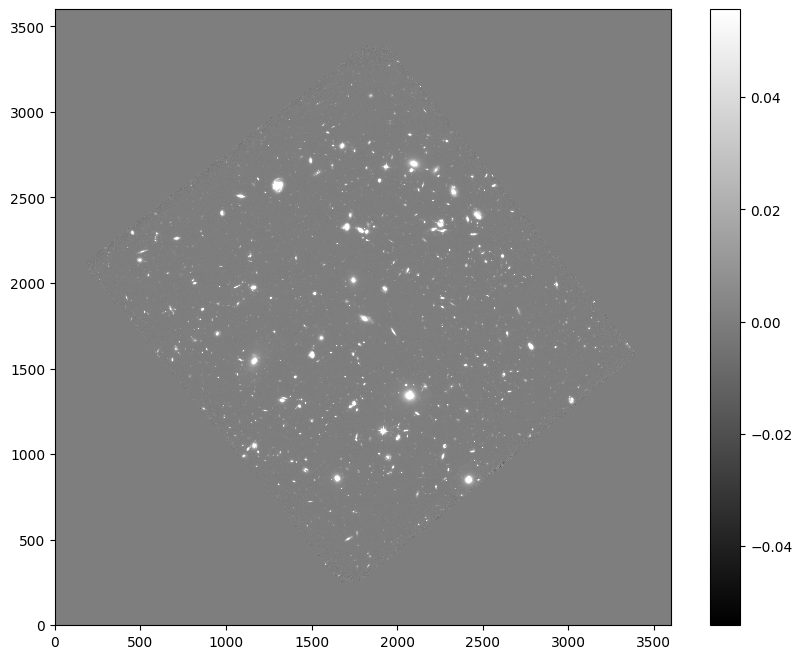

In [4]:
# show the image
m, s = np.mean(data.data), np.std(data.data)
plt.imshow(data.data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('origin_image.png')

In [5]:
# measure a spatially varying background on the image
datasw = data.byteswap(False).newbyteorder()
bkg = sep.Background(datasw)

In [6]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [7]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

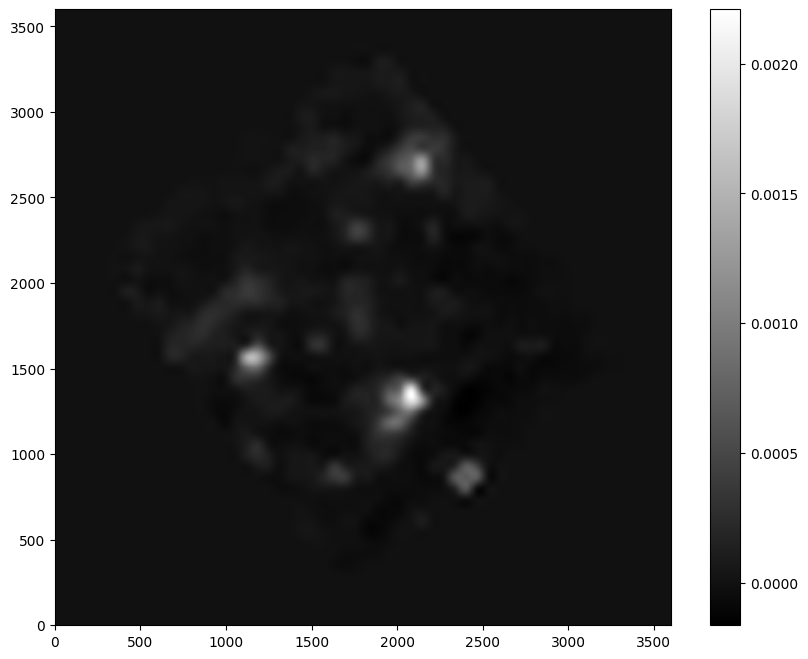

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('background.png')

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

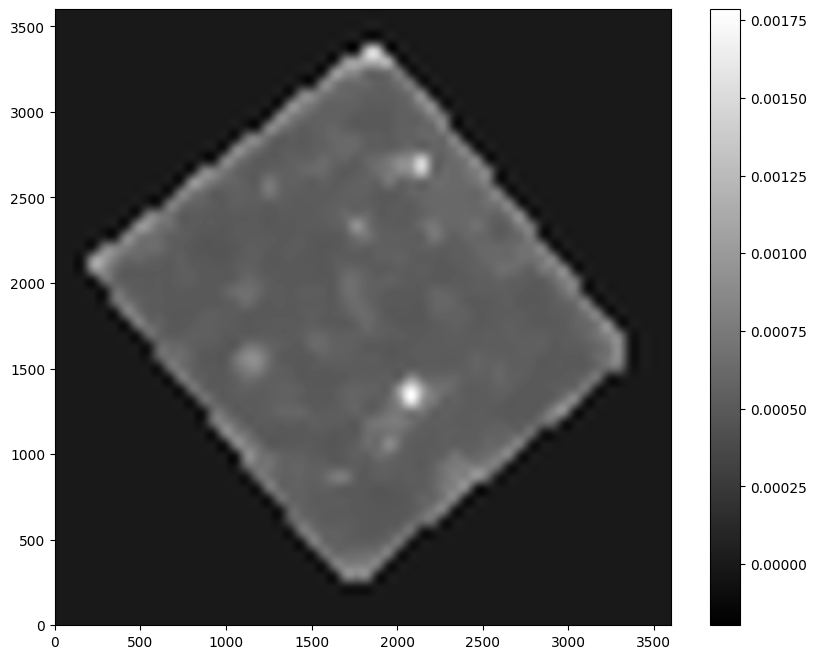

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('background_noise.png')

In [11]:
# subtract the background
data_sub = data - bkg


In [12]:
# select objects remaining
objects = sep.extract(data_sub, 30.0, err=bkg.globalrms)

In [13]:
# how many objects were detected
len(objects)

694

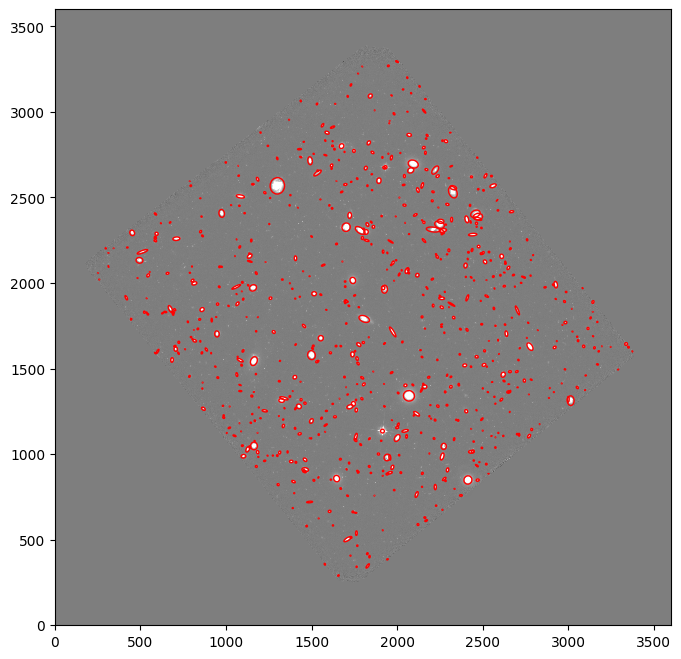

In [14]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('Circled_Objects.png')

In [15]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [17]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 1.152732 +/- 1.073658
object 1: flux = 0.554534 +/- 0.744676
object 2: flux = 1.122580 +/- 1.059523
object 3: flux = 0.875477 +/- 0.935674
object 4: flux = 0.687016 +/- 0.828869
object 5: flux = 0.762608 +/- 0.873279
object 6: flux = 0.496439 +/- 0.704590
object 7: flux = 1.254951 +/- 1.120250
object 8: flux = 0.973171 +/- 0.986499
object 9: flux = 3.211309 +/- 1.792015


(array([ 0.,  0.,  0., 13., 82., 72., 47., 45., 42., 50., 31., 27., 18.,
        19.,  8., 17., 11.,  9.,  6.,  7.,  9., 10.,  7.,  8.,  7.,  9.,
         5.,  8.,  4.,  5.,  4.,  2.,  7.,  4.,  6.,  3.,  3.,  3.,  1.,
         5.,  3.,  2.,  1.,  1.,  1.,  1.,  2.,  3.,  3.,  1.,  0.,  1.,
         2.,  0.,  3.,  1.,  2.,  1.,  0.,  1.,  1.,  1.,  3.,  1.,  2.,
         1.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  3.,  0.,  1.,  3.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ,
        0.99, 1.08, 1.17, 1.26, 1.35, 1.44, 1.53, 1.62, 1.71, 1.8 , 1.89,
        1.98, 2.07, 2.16, 2.25, 2.34, 2.43, 2.52, 2.61, 2.7 , 2.79, 2.88,
        2.97, 3.06, 3.15, 3.24, 3.33, 3.42, 3.51, 3.6 , 3.69, 3.78, 3.87,
        3.96, 4.05, 4.14, 4.23, 4.32, 4.41, 4.5 , 4.59, 4.68, 4.77, 4.86,
        4.95, 5.04, 5.13, 5.22, 5.31, 5.4 , 5.49, 5.58, 5.67, 5.

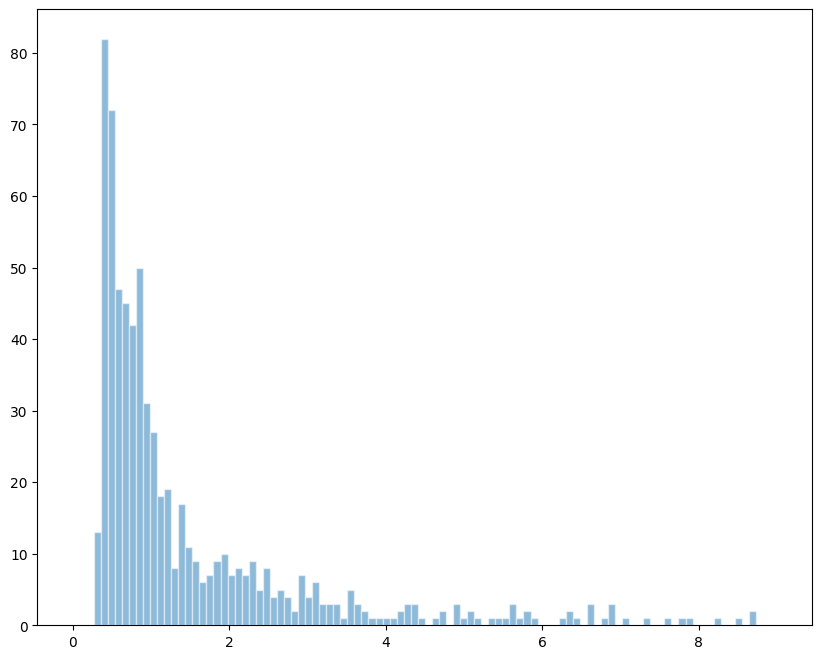

In [18]:
#histogram the fluxes excluding large outliers
plt.hist(flux,bins=100,range=(0,9),alpha=0.5,edgecolor="white")

In [19]:
#take mean, median and standard deviation of the fulxes
fluxmean = np.mean(flux)
fluxmed = np.median(flux)
fluxstd = np.std(flux)
print(fluxmean)
print(fluxmed)
print(fluxstd)

4.002130043240317
0.8949735747277738
32.34797702331902


In [20]:
#find largest flux (no negative fluxes) and measure amounts of stds away from mean
maxnum = 0
for item in flux:
    if(item > maxnum):
        maxnum = item
print(np.where(flux == maxnum))
print(f'largest outlier is {flux[132]/fluxstd} stds away from mean')

(array([132]),)
largest outlier is 24.913779476733833 stds away from mean


In [21]:
#grab data of images
f160w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
f125w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f105w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

In [22]:
#clean data type and subtract background
f160w = f160w.byteswap().newbyteorder()
f125w = f125w.byteswap().newbyteorder()
f105w = f105w.byteswap().newbyteorder()

bkg_f160w = sep.Background(f160w)
bkg_f125w = sep.Background(f125w)
bkg_f105w = sep.Background(f105w)

f160w -= bkg_f160w
f125w -= bkg_f125w
f105w -= bkg_f105w

In [23]:
#define function to scale the image
def rescale_data(data,dmin=0.01,dmax=10.0):
    datac = np.clip(data,dmin,dmax)
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))

In [24]:
#scale data
p_f160w = rescale_data(f160w)
p_f125w = rescale_data(f125w)
p_f105w = rescale_data(f105w)

In [25]:
#put image data together for red, green, blue
rgb = np.stack([p_f105w,0.7*p_f125w,p_f160w],axis=-1)
print(rgb.shape)

(3600, 3600, 3)


[W 2024-12-09 22:50:56,636.636 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


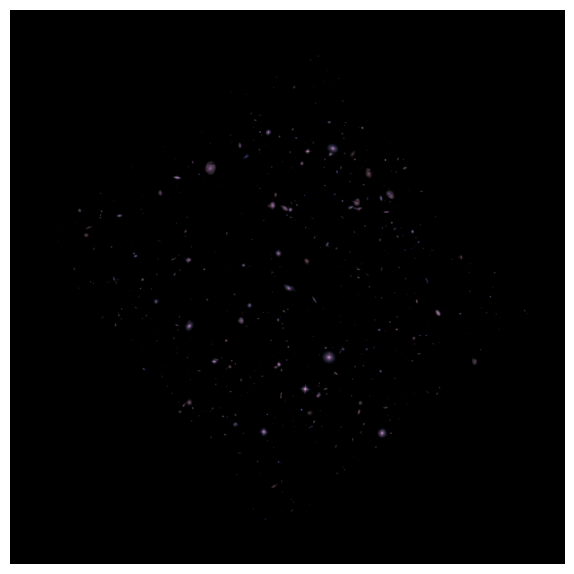

In [26]:
#create rgb image
xsize = rgb.shape[1]
ysize = rgb.shape[0]

f, ax  = plt.subplots(1,1,figsize=(xsize/500.0,ysize/500.0))
ax.axis('off')
ax.imshow(rgb,origin='lower')
plt.savefig('color_image.png')